# SVR, Decision Tree, Ensemble Methods, LSTM, GRU


## Import Libraries

In [ ]:
!pip install plotly
!pip install catboost
!pip install ngboost

In [ ]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import os

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from catboost.utils import eval_metric
from ngboost import NGBRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from itertools import cycle

import pickle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

## Import Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project1_Stock_Price/datasets3/pre_samsung_e.csv', encoding='cp949')
df.head()

,Date,Close,foreign,kospi,volatility,consumption,yield_bond,snp500,fng,gold,copper,wti,pork,usd_krw,cny_krw,eur_krw,jpy_krw,covid,weekday
0,2019-01-02,38750,49974911900,2010.00,19.00,1189.23,1214.51,2510.030029,30,46280.0,2.6795,46.54,61.70,112012.0,166.66,127061.0,10.2876,0.0,2
1,2019-01-03,37600,9790670700,1993.70,18.85,1179.03,1213.63,2447.889893,33,46760.0,2.6375,47.09,62.15,112589.0,166.66,128284.0,10.4573,0.0,3
2,2019-01-04,37450,-56379046500,2010.25,18.15,1189.27,1213.69,2531.939941,48,46810.0,2.7095,47.96,61.95,111685.0,166.66,127265.0,10.2907,0.0,4
3,2019-01-07,38750,66372420800,2037.10,16.05,1192.68,1212.70,2549.689941,39,46690.0,2.6980,48.52,61.90,111766.0,166.66,128258.0,10.2806,0.0,0
4,2019-01-08,38100,-48549024550,2025.27,15.95,1186.00,1211.56,2574.409912,39,46450.0,2.7230,49.78,62.60,112283.0,166.66,128474.0,10.3254,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         741 non-null    object 
 1   Close        741 non-null    int64  
 2   foreign      741 non-null    int64  
 3   kospi        741 non-null    float64
 4   volatility   741 non-null    float64
 5   consumption  741 non-null    float64
 6   yield_bond   741 non-null    float64
 7   snp500       741 non-null    float64
 8   fng          741 non-null    int64  
 9   gold         741 non-null    float64
 10  copper       741 non-null    float64
 11  wti          741 non-null    float64
 12  pork         741 non-null    float64
 13  usd_krw      741 non-null    float64
 14  cny_krw      741 non-null    float64
 15  eur_krw      741 non-null    float64
 16  jpy_krw      741 non-null    float64
 17  covid        741 non-null    float64
 18  weekday      741 non-null    int64  
dtypes: float

In [ ]:
# df['Date'] = pd.to_datetime(df['Date'])
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         741 non-null    datetime64[ns]
 1   Close        741 non-null    int64         
 2   foreign      741 non-null    int64         
 3   kospi        741 non-null    float64       
 4   volatility   741 non-null    float64       
 5   consumption  741 non-null    float64       
 6   yield_bond   741 non-null    float64       
 7   snp500       741 non-null    float64       
 8   fng          741 non-null    int64         
 9   gold         741 non-null    float64       
 10  copper       741 non-null    float64       
 11  wti          741 non-null    float64       
 12  pork         741 non-null    float64       
 13  usd_krw      741 non-null    float64       
 14  cny_krw      741 non-null    float64       
 15  eur_krw      741 non-null    float64       
 16  jpy_krw 

In [ ]:
df.shape

(741, 19)

# Prepare Data for Analysis

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,Close,foreign,kospi,volatility,consumption,yield_bond,snp500,fng,gold,copper,wti,pork,usd_krw,cny_krw,eur_krw,jpy_krw,covid,weekday
Date,,,,,,,,,,,,,,,,,,
2019-01-02,38750,49974911900,2010.00,19.00,1189.23,1214.51,2510.030029,30,46280.0,2.6795,46.54,61.70,112012.0,166.66,127061.0,10.2876,0.0,2
2019-01-03,37600,9790670700,1993.70,18.85,1179.03,1213.63,2447.889893,33,46760.0,2.6375,47.09,62.15,112589.0,166.66,128284.0,10.4573,0.0,3
2019-01-04,37450,-56379046500,2010.25,18.15,1189.27,1213.69,2531.939941,48,46810.0,2.7095,47.96,61.95,111685.0,166.66,127265.0,10.2907,0.0,4
2019-01-07,38750,66372420800,2037.10,16.05,1192.68,1212.70,2549.689941,39,46690.0,2.6980,48.52,61.90,111766.0,166.66,128258.0,10.2806,0.0,0
2019-01-08,38100,-48549024550,2025.27,15.95,1186.00,1211.56,2574.409912,39,46450.0,2.7230,49.78,62.60,112283.0,166.66,128474.0,10.3254,0.0,1


In [ ]:
feature_columns = list(df.columns.difference(['Close']))
# feature_columns = list(df.columns.difference(['Close', 'Date']))
# feature_columns
X = df[feature_columns]
y = df['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(555, 17) (186, 17) (555,) (186,)


# SVM

# Decision Tree

In [ ]:
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [ ]:
print("Train MSE: ", mean_squared_error(y_train, dt.predict(X_train)), "\nTrain R2: ", r2_score(y_train, dt.predict(X_train)))
print("\nTest MSE: ", mean_squared_error(y_test, dt_pred), "\nTest R2: ", r2_score(y_test, dt_pred))

Train MSE:  3658908.759399433 
Train R2:  0.9830545093604435

Test MSE:  4929119.882093098 
Test R2:  0.9754413868286108


# Ensemble Methods

## Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
# scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=3)
# scores

In [ ]:
print("Train MSE: ", mean_squared_error(y_train, rf.predict(X_train)), "\nTrain R2: ", r2_score(y_train, rf.predict(X_train)))
print("\nTest MSE: ", mean_squared_error(y_test, rf_pred), "\nTest R2: ", r2_score(y_test, rf_pred))

Train MSE:  174016.54594594595 
Train R2:  0.9991940778127141

Test MSE:  1341404.4506048388 
Test R2:  0.9933166500720622


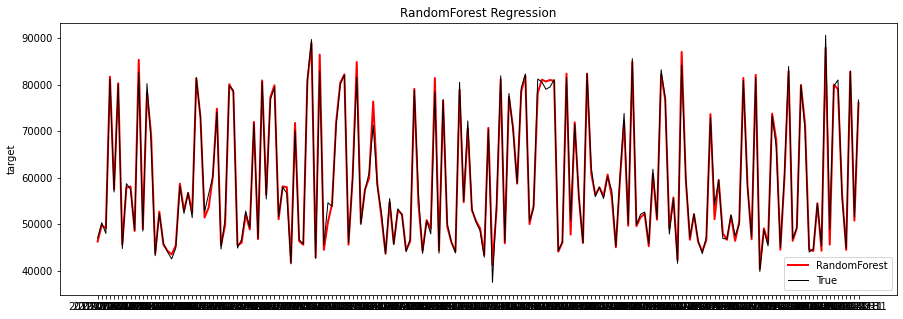

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
# plt.scatter(y_train, c="k", label="training samples")
plt.plot(rf_pred, c="r", label="RandomForest", linewidth=2)
plt.plot(y_test, c='k', label="True", linewidth=1)
# plt.xlabel("data")
plt.ylabel("target")
plt.title("RandomForest Regression")
plt.legend()
plt.show()

## adaBoosting

In [ ]:
ada = AdaBoostRegressor(n_estimators=300, random_state=42, learning_rate=0.1)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

In [ ]:
print("Train MSE: ", mean_squared_error(y_train, ada.predict(X_train)), "\nTrain R2: ", r2_score(y_train, ada.predict(X_train)))
print("Test MSE: ", mean_squared_error(y_test, ada_pred), "Test R2: ", r2_score(y_test, ada_pred))

Train MSE:  3225708.8235393637 
Train R2:  0.9850607866253016
Test MSE:  3718828.4387118444 Test R2:  0.9814714855264783


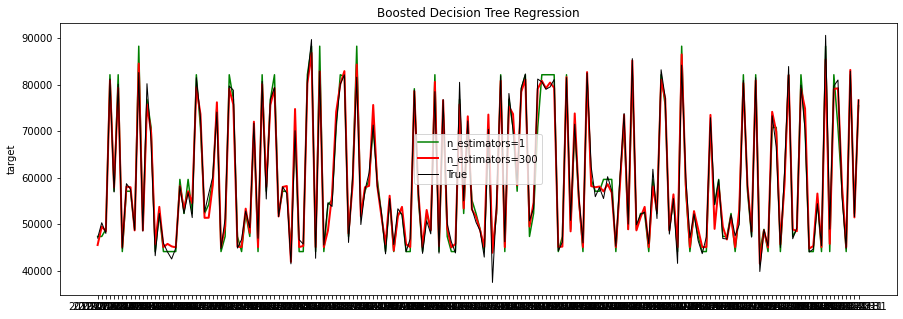

In [ ]:
plt.figure(figsize=(15,5))
# plt.scatter(y_train, c="k", label="training samples")
plt.plot(dt_pred, c="g", label="n_estimators=1")
plt.plot(ada_pred, c="r", label="n_estimators=300", linewidth=2)
plt.plot(y_test, c='k', label="True", linewidth=1)
# plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

## XGBoosting

## CatBoosting

In [ ]:
cat = CatBoostRegressor(iterations=100, verbose=10)

cat.fit(X_train, y_train, eval_set=(X_test, y_test))
cat.set_feature_names(feature_columns)

cat_pred = cat.predict(X_test)
# train_pred = cat.predict(X_train)

Learning rate set to 0.189125
0:	learn: 12549.9800082	test: 12242.7173009	best: 12242.7173009 (0)	total: 51.5ms	remaining: 5.1s
10:	learn: 2868.7761688	test: 2704.1063905	best: 2704.1063905 (10)	total: 90.7ms	remaining: 734ms
20:	learn: 1445.2196861	test: 1597.9948445	best: 1597.9948445 (20)	total: 131ms	remaining: 494ms
30:	learn: 1129.6192054	test: 1448.4879855	best: 1448.4879855 (30)	total: 170ms	remaining: 378ms
40:	learn: 961.4512189	test: 1335.0828165	best: 1335.0828165 (40)	total: 215ms	remaining: 310ms
50:	learn: 828.7654857	test: 1253.0672027	best: 1253.0672027 (50)	total: 254ms	remaining: 244ms
60:	learn: 738.2080804	test: 1214.3895243	best: 1214.3895243 (60)	total: 298ms	remaining: 190ms
70:	learn: 653.6051703	test: 1195.6689087	best: 1195.6689087 (70)	total: 338ms	remaining: 138ms
80:	learn: 610.2250270	test: 1179.1971663	best: 1179.1971663 (80)	total: 377ms	remaining: 88.5ms
90:	learn: 560.2418418	test: 1164.6888814	best: 1164.6888814 (90)	total: 420ms	remaining: 41.6ms
99

In [ ]:
print("Train MSE: ", mean_squared_error(y_train, cat.predict(X_train)), "\nTrain R2: ", r2_score(y_train, cat.predict(X_train)))
print("\nTest MSE: ", mean_squared_error(y_test, cat_pred), "\nTest R2: ", r2_score(y_test, cat_pred))

Train MSE:  262994.1042784488 
Train R2:  0.9987819963750503

Test MSE:  1317402.6206740455 
Test R2:  0.9934362356513898


#### GridSearch

In [ ]:
cat = CatBoostRegressor()

params = {
            'iterations':[100,500],
            'learning_rate':[0.01, 0.1],
            'verbose':[0.1,10],
            'bootstrap_type':['Bayesian', 'No']
}

search_results = cat.grid_search(params, X_train, y_train, cv=5)

print("\nBest Params : ", search_results['params'])

0:	learn: 62175.8367212	test: 64434.9275296	best: 64434.9275296 (0)	total: 13ms	remaining: 1.28s
10:	learn: 56902.7255807	test: 59065.6101543	best: 59065.6101543 (10)	total: 62ms	remaining: 502ms
20:	learn: 52012.3141661	test: 54065.8295611	best: 54065.8295611 (20)	total: 101ms	remaining: 380ms
30:	learn: 47572.6471889	test: 49545.6626335	best: 49545.6626335 (30)	total: 151ms	remaining: 335ms
40:	learn: 43645.0992194	test: 45616.2435489	best: 45616.2435489 (40)	total: 192ms	remaining: 276ms
50:	learn: 39984.6766474	test: 41900.8767721	best: 41900.8767721 (50)	total: 234ms	remaining: 225ms
60:	learn: 36669.9892600	test: 38525.4514953	best: 38525.4514953 (60)	total: 276ms	remaining: 177ms
70:	learn: 33589.4675108	test: 35393.1973649	best: 35393.1973649 (70)	total: 315ms	remaining: 129ms
80:	learn: 30797.9095261	test: 32566.5932979	best: 32566.5932979 (80)	total: 355ms	remaining: 83.2ms
90:	learn: 28170.7371238	test: 29899.1496609	best: 29899.1496609 (90)	total: 393ms	remaining: 38.9ms
99

In [ ]:
cat = CatBoostRegressor(iterations=500, verbose=10, learning_rate= 0.1, bootstrap_type= 'No')

cat.fit(X_train, y_train, eval_set=(X_test, y_test))
cat.set_feature_names(feature_columns)

cat_pred = cat.predict(X_test)
# train_preds = cat.predict(X_train)

0:	learn: 13462.3427249	test: 13082.9504781	best: 13082.9504781 (0)	total: 4.17ms	remaining: 2.08s
10:	learn: 5756.0999744	test: 5486.0729917	best: 5486.0729917 (10)	total: 43.2ms	remaining: 1.92s
20:	learn: 2821.2806755	test: 2719.1749721	best: 2719.1749721 (20)	total: 82.3ms	remaining: 1.88s
30:	learn: 1784.3944504	test: 1852.7081361	best: 1852.7081361 (30)	total: 125ms	remaining: 1.9s
40:	learn: 1355.6958962	test: 1550.7612876	best: 1550.7612876 (40)	total: 165ms	remaining: 1.84s
50:	learn: 1149.1817749	test: 1422.8131263	best: 1422.8131263 (50)	total: 207ms	remaining: 1.82s
60:	learn: 1019.5182126	test: 1348.0326610	best: 1348.0326610 (60)	total: 258ms	remaining: 1.86s
70:	learn: 915.9420641	test: 1271.6077293	best: 1271.6077293 (70)	total: 297ms	remaining: 1.79s
80:	learn: 841.4864165	test: 1235.4477328	best: 1235.4477328 (80)	total: 335ms	remaining: 1.73s
90:	learn: 778.7003209	test: 1199.5982789	best: 1199.5982789 (90)	total: 374ms	remaining: 1.68s
100:	learn: 719.6482418	test: 

In [ ]:
print("Train MSE: ", mean_squared_error(y_train, cat.predict(X_train)), "\nTrain R2: ", r2_score(y_train, cat.predict(X_train)))
print("\nTest MSE: ", mean_squared_error(y_test, cat_pred), "\nTest R2: ", r2_score(y_test, cat_pred))

Train MSE:  19085.562225340476 
Train R2:  0.9999116091060731

Test MSE:  1037531.1860997013 
Test R2:  0.9948306538160612


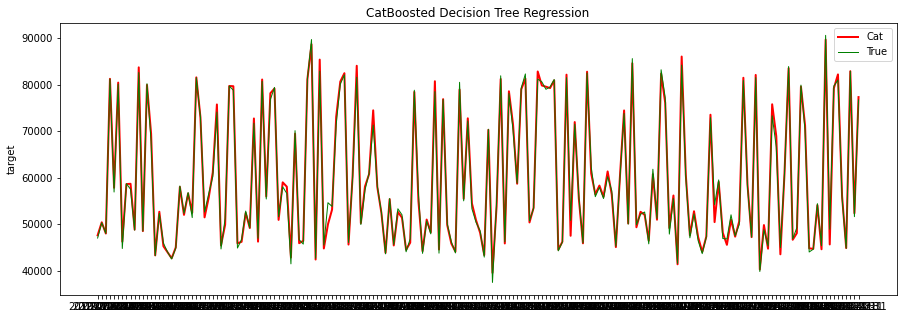

In [ ]:
plt.figure(figsize=(15,5))
# plt.scatter(y_train, c="k", label="training samples")
plt.plot(cat_pred, c="r", label="Cat", linewidth=2)
plt.plot(y_test, c='g', label="True", linewidth=1)
# plt.xlabel("data")
plt.ylabel("target")
plt.title("CatBoosted Decision Tree Regression")
plt.legend()
plt.show()

## NGBoosting

In [ ]:
ngb = NGBRegressor()

ngb.fit(X_train, y_train)
ngb_pred = ngb.predict(X_test)
ngb_dists = ngb.pred_dist(X_test)

[iter 0] loss=11.0142 val_loss=0.0000 scale=1.0000 norm=13185.2973
[iter 100] loss=9.8814 val_loss=0.0000 scale=2.0000 norm=4199.7063
[iter 200] loss=8.9808 val_loss=0.0000 scale=2.0000 norm=1660.9561
[iter 300] loss=8.2720 val_loss=0.0000 scale=2.0000 norm=1212.8681
[iter 400] loss=7.8914 val_loss=0.0000 scale=1.0000 norm=525.2706


In [ ]:
print("Train MSE: ", mean_squared_error(y_train, ngb.predict(X_train)), "\nTrain R2: ", r2_score(y_train, ngb.predict(X_train)))
print("Test MSE: ", mean_squared_error(y_test, ngb_pred), "\nTest R2: ", r2_score(y_test, ngb_pred))

Train MSE:  377814.5642608498 
Train R2:  0.9982502288023106
Test MSE:  1642698.7782865816 
Test R2:  0.9918154955006039


# RNN

## LSTM

## GRU

## Summary

### Prediction + Graph

In [ ]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
    'gru':grudf,
    'lstm_gru':lstmgrudf,
})
finaldf.head()

,svr,rf,knn,lstm,gru,lstm_gru
0,32400.0,32400.0,32400.0,32400.0,32400.0,32400.0
1,31800.0,31800.0,31800.0,31800.0,31800.0,31800.0
2,32350.0,32350.0,32350.0,32350.0,32350.0,32350.0
3,33500.0,33500.0,33500.0,33500.0,33500.0,33500.0
4,33900.0,33900.0,33900.0,33900.0,33900.0,33900.0


In [ ]:
finaldf.tail()

,svr,rf,knn,lstm,gru,lstm_gru
746,31353.679754,28314.0,27713.333333,29834.259623,30335.917342,28714.537129
747,32005.018003,28258.0,27713.333333,29912.731358,30503.102514,28590.547037
748,32328.383113,28382.0,27636.666667,29991.080740,30670.697930,28469.306299
749,32220.932651,28398.5,27626.666667,30068.746382,30838.536614,28351.344633
750,32490.005078,28378.5,27536.666667,30144.886205,31006.523561,28235.796928


In [ ]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU','LSTM + GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:], 
                                          finaldf['lstm'][225:], finaldf['gru'][225:], finaldf['lstm_gru'][225:]],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

### BoxPlot
- https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

In [ ]:
models = []
models.append(('SVM', SVR()))
models.append(('Decision Tree', LinearDiscriminantAnalysis()))
models.append(('Random Forest', KNeighborsClassifier()))
models.append(('adaBoosting', DecisionTreeClassifier()))
models.append(('XGBoosting', DecisionTreeClassifier()))
models.append(('CatBoosting', GaussianNB()))
models.append(('NGBoosting', SVC()))
models.append(('LSTM', SVC()))
models.append(('GRU', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'R2'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring) # 수정필요
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
 
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Better Visualization
- https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

models = [
          ('SVM', LogisticRegression()), 
          ('Decision Tree', RandomForestClassifier()),
          ('Random Forest', KNeighborsClassifier()),
          ('adaBoosting', SVC()), 
          ('XGBoosting', GaussianNB()),
          ('CatBoosting', XGBClassifier())
          ('NGBoosting', XGBClassifier())
          ('LSTM', XGBClassifier())
          ('GRU', XGBClassifier())
        ]
results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['malignant', 'benign']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
results.append(cv_results)
        names.append(name)
this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
final = pd.concat(dfs, ignore_index=True)
return final

In [ ]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [ ]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

In [ ]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

In [ ]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])